# Implementing Berstein-Vazirani Algorithm

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt

simulator = AerSimulator()

def quasi_probs_to_counts(quasi_probs, shots):
    counts = {}
    for bitstring, quasi_prob in quasi_probs.items():
        counts[bitstring] = int(round(quasi_prob * shots))
    return counts



     ┌───┐     ┌───┐        ┌─┐   
q_0: ┤ H ├──■──┤ H ├────────┤M├───
     ├───┤  │  ├───┤┌─┐     └╥┘   
q_1: ┤ H ├──┼──┤ H ├┤M├──────╫────
     ├───┤  │  └───┘└╥┘┌───┐ ║ ┌─┐
q_2: ┤ H ├──┼────■───╫─┤ H ├─╫─┤M├
     └───┘┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ─────┤ X ├┤ X ├─╫───────╫──╫─
          └───┘└───┘ ║       ║  ║ 
c: 3/════════════════╩═══════╩══╩═
                     1       0  2 
Bernstein-Vazirani Algorithm:
{0: 539, 5: 485}


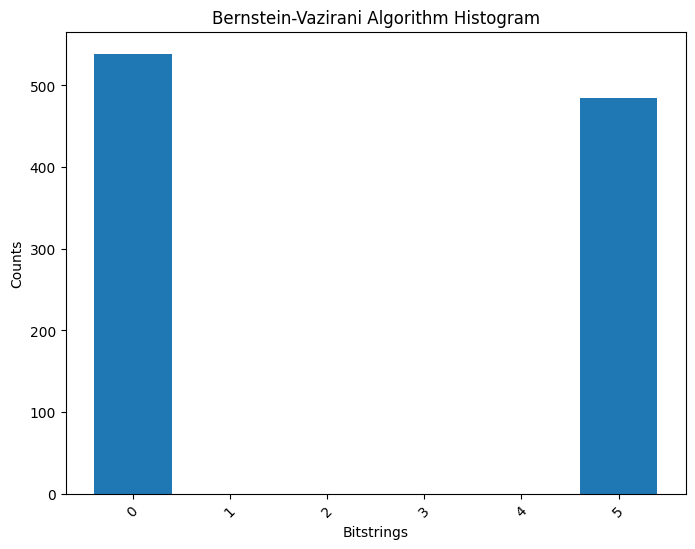

In [2]:
def bernstein_vazirani():
    n = 3  # Number of qubits
    a = '101'  # Secret string
    bv_circuit = QuantumCircuit(n + 1, n)

    # Apply Hadamard gates
    bv_circuit.h(range(n))

    # Oracle
    for i in range(n):
        if a[i] == '1':
            bv_circuit.cx(i, n)

    # Apply Hadamard gates
    bv_circuit.h(range(n))

    
    # Measure the qubits
    bv_circuit.measure(range(n), range(n))
    print(bv_circuit)
    bv_circuit = transpile(bv_circuit, simulator)
    sampler = Sampler()
    result = sampler.run([bv_circuit], shots=1024).result()
    quasi_probs = result.quasi_dists[0]
    counts = quasi_probs_to_counts(quasi_probs, 1024)
    print("Bernstein-Vazirani Algorithm:")
    print(counts)
    
    # Plot histogram with binary x-axis labels
    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Bitstrings')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.title("Bernstein-Vazirani Algorithm Histogram")
    plt.show()

bernstein_vazirani()
